<a href="https://colab.research.google.com/github/Mohak91/Course-on-comparative-genomics-of-bacteria/blob/main/Comparative_Genomics_of_bacteria_practical_session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Golden rule: Google is your best friend.

##1) Preparing the environment for analysis

In [2]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached biopython-1.79-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (2.3 MB)
     |████████████████████████████████| 15.7 MB 28.4 MB/s 


In [3]:
import os
import sys
import Bio

In [4]:
!pip install -q condacolab
import condacolab
condacolab.install_miniconda()

✨🍰✨ Everything looks OK!


In [5]:
!conda install -c bioconda -y mafft

Solving environment: | / - \ | / - \ done

# All requested packages already installed.



In [6]:
!conda install -c bioconda raxml-ng modeltest-ng --yes

Solving environment: | / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - modeltest-ng
    - raxml-ng


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    gmp-6.2.1                  |       h295c915_3         544 KB
    libgfortran-ng-7.5.0       |      ha8ba4b0_17          22 KB
    libgfortran4-7.5.0         |      ha8ba4b0_17         995 KB
    modeltest-ng-0.1.6         |       h78e549b_0         2.5 MB  bioconda
    mpi-1.0                    |          openmpi           7 KB
    openmpi-4.0.2              |       hb1b8

We are going to study the evolution of a non-homologous end joining repair protein called Ku. (*Sharda et. al. 2020, Genome Biology and Evolution*)

In [8]:
from Bio import SeqIO, Entrez

Entrez.email = 'mohaks@ncbs.res.in'

#GI for Ku from Pseudomonas aeruginosa is 81541030
downloaded_seq = Entrez.efetch(db="protein",rettype="fasta",id="81541030") #81541030

#Writing the downloaded sequence into a fasta file
ku_query_outfile = open(".fasta",'w')

#Using SeqIO to read the Ku protein sequence in a fasta format
ku_query_sequence = SeqIO.read(downloaded_seq, format="fasta")

#Writing the ku query record into a fasta file
SeqIO.write(ku_query_sequence,ku_query_outfile,"fasta")

#Closing both handles
downloaded_seq.close()
ku_query_outfile.close()

In [9]:
#What is the length of the Ku protein sequence from P. aeruginosa?
print("Sequence length (aa):")
print(len(ku_query_sequence))

Sequence length (aa):
293


In [10]:
#Printing sequence description
print("Sequence description:")
print()

#Printing sequence accession ID
print("Sequence ID:")
print()

#Printing amino acid sequence
print("Amino acid sequence:")
print()

The description of the sequence is:
sp|Q9I1W5.1|KU_PSEAE RecName: Full=Non-homologous end joining protein Ku
The ID of the sequence is:
sp|Q9I1W5.1|KU_PSEAE
The sequence is:
MARAIWKGAISFGLVHIPVSLSAATSSQGIDFDWLDQRSMEPVGYKRVNKVTGKEIERENIVKGVEYEKGRYVVLSEEEIRAAHPKSTQTIEIFAFVDSQEIPLQHFDTPYYLVPDRRGGKVYALLRETLERTGKVALANVVLHTRQHLALLRPLQDALVLITLRWPSQVRSLDGLELDESVTEAKLDKRELEMAKRLVEDMASHWEPDEYKDSFSDKIMKLVEEKAAKGQLHAVEEEEEVAGKGADIIDLTDLLKRSLRSRAGGGKDKGSEKAGADAKGRAKSGASRSRRKA


In [15]:
%%time
from Bio.Blast import NCBIWWW
ku_blast_results = NCBIWWW.qblast("blastp", "swissprot", ku_query_sequence.seq)

CPU times: user 290 ms, sys: 38.8 ms, total: 329 ms
Wall time: 1min


In [16]:
from Bio.Blast import NCBIXML
ku_results_xml_format = NCBIXML.read(ku_blast_results)
ku_blast_results.close()

In [17]:
for alignment in ku_results_xml_format.alignments:

  for hsp in alignment.hsps:
    
    print("Description:")
    print(alignment.hit_def)

    print("Hit ID:")
    print(alignment.hit_id)
    
    print("Hit sequence length:")
    print(alignment.length)
    
    print("E-value:")
    print(hsp.expect)

Hit ID:
sp|Q9I1W5.1|
Hit sequence length:
293
E-value:
0.0
RecName: Full=Non-homologous end joining protein Ku [Pseudomonas aeruginosa PAO1]
Hit ID:
sp|Q87ZG4.1|
Hit sequence length:
299
E-value:
1.04111e-135
RecName: Full=Non-homologous end joining protein Ku [Pseudomonas syringae pv. tomato str. DC3000]
Hit ID:
sp|Q0JYN7.1|
Hit sequence length:
339
E-value:
1.03936e-85
RecName: Full=Non-homologous end joining protein Ku [Cupriavidus necator H16]
Hit ID:
sp|A9NBB7.1|
Hit sequence length:
274
E-value:
1.76253e-67
RecName: Full=Non-homologous end joining protein Ku [Coxiella burnetii RSA 331]
Hit ID:
sp|B1ZWL2.1|
Hit sequence length:
278
E-value:
3.01475e-61
RecName: Full=Non-homologous end joining protein Ku [Opitutus terrae PB90-1]
Hit ID:
sp|B0TIF2.2|
Hit sequence length:
276
E-value:
1.89307e-51
RecName: Full=Non-homologous end joining protein Ku [Heliomicrobium modesticaldum Ice1]
Hit ID:
sp|B4UFZ1.1|
Hit sequence length:
296
E-value:
7.44893e-50
RecName: Full=Non-homologous end jo

In [18]:
#Setting a sequence identity cut-off
PIDcut=1.00
for alignment in ku_results_xml_format.alignments:
  for hsp in alignment.hsps:
#Print hits equal or less than a PID cutoff
    if(hsp.identities/hsp.align_length) <= PIDcut:
      print("Accession code:", alignment.hit_id)
      print("Sequence length:", alignment.length)
      print("Alignment length:", hsp.align_length)
      print("E-value:", hsp.expect)
#Sequence identity relative to the length of the alignment in percentage
      print("Sequence Identity [%]:", "{:.2f}".format(100*hsp.identities/hsp.align_length))
#Sequence coverage relative to the length of the sequence in percentage
      print("Sequence Coverage [%]:", "{:.2f}".format(100*sum(x.isalpha() for x in hsp.query)/len(ku_query_sequence)))
      print()
      print("query:", hsp.query[0:25] + "...")
      print("      ", hsp.match[0:25] + "...")
      print("sbjct:", hsp.sbjct[0:25] + "...")
      print()

Accession code: sp|Q9I1W5.1|
Sequence length: 293
Alignment length: 293
E-value: 0.0
Sequence Identity [%]: 100.00
Sequence Coverage [%]: 100.00

query: MARAIWKGAISFGLVHIPVSLSAATSSQGIDFDWLDQRSMEPVGYKRVNKVTGKEIEREN...
       MARAIWKGAISFGLVHIPVSLSAATSSQGIDFDWLDQRSMEPVGYKRVNKVTGKEIEREN...
sbjct: MARAIWKGAISFGLVHIPVSLSAATSSQGIDFDWLDQRSMEPVGYKRVNKVTGKEIEREN...

Accession code: sp|Q87ZG4.1|
Sequence length: 299
Alignment length: 296
E-value: 1.04111e-135
Sequence Identity [%]: 64.19
Sequence Coverage [%]: 97.27

query: MARAIWKGAISFGLVHIPVSLSAATSSQGIDFDWLDQRSMEPVGYKRVNKVTGKEIEREN...
       MARAIWKGAISFGLVHIPV+L +AT+S  +DFDWLD+RSM+PVGYKR+NKVTGKE+ +EN...
sbjct: MARAIWKGAISFGLVHIPVALVSATTSNSVDFDWLDKRSMDPVGYKRINKVTGKEVTKEN...

Accession code: sp|Q0JYN7.1|
Sequence length: 339
Alignment length: 293
E-value: 1.03936e-85
Sequence Identity [%]: 49.15
Sequence Coverage [%]: 98.29

query: MARAIWKGAISFGLVHIPVSLSAATSSQGIDFDWLDQRSMEPVGYKRVNKVTGKEIEREN...
       M+R IWKGAI+FGLV+IPV L  A+ SQ +D D LD R M PV

In [19]:
Entrez.email = 'mohaks@ncbs.res.in'

with open("sequences.fasta", "a") as allhits_out:
#writing top 20 hits
  for alignment in blast_record.alignments[:20]:
    for hsp in alignment.hsps:
    #Fetch only sequences below a PID cutoff
      if(hsp.identities/len(hsp.match)) <= PIDcut:
        print("Fetching protein sequence:", alignment.hit_id)
        fetch = Entrez.efetch(db="protein", id=alignment.hit_id, rettype="fasta")
        #Reading the sequence stored in the temporary string in fasta format
        allhits_seqs = SeqIO.read(fetch, format="fasta")
        #Writing the sequence and its ID in fasta format
        SeqIO.write(allhits_seqs,allhits_out,"fasta")
        fetch.close()
#Closing the efetch and file
allhits_out.close()

Fetching protein sequence: sp|Q9I1W5.1|
Fetching protein sequence: sp|Q87ZG4.1|
Fetching protein sequence: sp|Q0JYN7.1|
Fetching protein sequence: sp|A9NBB7.1|
Fetching protein sequence: sp|B1ZWL2.1|
Fetching protein sequence: sp|B0TIF2.2|
Fetching protein sequence: sp|B4UFZ1.1|
Fetching protein sequence: sp|A5FEP6.1|
Fetching protein sequence: sp|Q1INE2.1|
Fetching protein sequence: sp|Q67NG0.1|
Fetching protein sequence: sp|B8FRH5.1|
Fetching protein sequence: sp|Q021H8.1|
Fetching protein sequence: sp|O34859.1|
Fetching protein sequence: sp|A4FG06.1|
Fetching protein sequence: sp|A4FFJ9.1|
Fetching protein sequence: sp|O28548.2|
Fetching protein sequence: sp|A0R3S7.2|
Fetching protein sequence: sp|P9WKD8.1|
Fetching protein sequence: sp|B2JMF6.1|
Fetching protein sequence: sp|Q2J6D7.1|


In [20]:
#running multiple sequence alignment
from Bio.Align.Applications import MafftCommandline
mafft_cline=MafftCommandline(input="sequences.fasta")
print(mafft_cline)
stdout, stderr = mafft_cline()
with open("aligned.fasta", "w") as handle:
  handle.write(stdout)
from Bio import AlignIO
align = AlignIO.read("aligned.fasta", "fasta")

mafft sequences.fasta


In [21]:
#@title Protein MSA Viewer in Google Colab
#The following code is modified from the wonderful viewer developed by Damien Farrell
#https://dmnfarrell.github.io/bioinformatics/bokeh-sequence-aligner

#Importing all modules first
import os, io, random
import string
import numpy as np

from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO, SeqIO

import panel as pn
import panel.widgets as pnw
pn.extension()

from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot

#Setting up the amino color code according to Zappo color scheme
def get_colors(seqs):
    #make colors for bases in sequence
    text = [i for s in list(seqs) for i in s]
    #Use Zappo color scheme
    clrs =  {'K':'red',
             'R':'red',
             'H':'red',             
             'D':'green',
             'E':'green',
             'Q':'blue',
             'N':'blue',
             'S':'blue',
             'T':'blue',
             'A':'blue',
             'I':'blue',
             'L':'blue',
             'M':'blue',
             'V':'blue',
             'F':'orange',
             'Y':'orange',
             'W':'orange',
             'C':'blue',
             'P':'yellow',
             'G':'orange',
             '-':'white',
             'Z':'black'}
    colors = [clrs[i] for i in text]
    return colors

#Setting up the MSA viewer
def view_alignment(aln, fontsize="9pt", plot_width=800):
    """Bokeh sequence alignment view"""

    #make sequence and id lists from the aln object
    seqs = [rec.seq for rec in (aln)]
    ids = [rec.id for rec in aln]    
    text = [i for s in list(seqs) for i in s]
    colors = get_colors(seqs)    
    N = len(seqs[0])
    S = len(seqs)    
    width = .4

    x = np.arange(1,N+1)
    y = np.arange(0,S,1)
    #creates a 2D grid of coords from the 1D arrays
    xx, yy = np.meshgrid(x, y)
    #flattens the arrays
    gx = xx.ravel()
    gy = yy.flatten()
    #use recty for rect coords with an offset
    recty = gy+.5
    h= 1/S
    #now we can create the ColumnDataSource with all the arrays
    source = ColumnDataSource(dict(x=gx, y=gy, recty=recty, text=text, colors=colors))
    plot_height = len(seqs)*15+50
    x_range = Range1d(0,N+1, bounds='auto')
    if N>100:
        viewlen=100
    else:
        viewlen=N
    #view_range is for the close up view
    view_range = (0,viewlen)
    tools="xpan, xwheel_zoom, reset, save"

    #entire sequence view (no text, with zoom)
    p = figure(title=None, plot_width= plot_width, plot_height=50,
               x_range=x_range, y_range=(0,S), tools=tools,
               min_border=0, toolbar_location='below')
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                 line_color=None, fill_alpha=0.6)
    p.add_glyph(source, rects)
    p.yaxis.visible = False
    p.grid.visible = False  

    #sequence text view with ability to scroll along x axis
    p1 = figure(title=None, plot_width=plot_width, plot_height=plot_height,
                x_range=view_range, y_range=ids, tools="xpan,reset",
                min_border=0, toolbar_location='below')#, lod_factor=1)          
    glyph = Text(x="x", y="y", text="text", text_align='center',text_color="black",
                text_font="monospace",text_font_size=fontsize)
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                line_color=None, fill_alpha=0.4)
    p1.add_glyph(source, glyph)
    p1.add_glyph(source, rects)

    p1.grid.visible = False
    p1.xaxis.major_label_text_font_style = "bold"
    p1.yaxis.minor_tick_line_width = 0
    p1.yaxis.major_tick_line_width = 0

    p = gridplot([[p],[p1]], toolbar_location='below')
    return p

#Loading the viewer by indicating the MSA file and format to read
#@markdown Name of the MSA file (including the filetype)
MSAfile = 'aligned.fasta' #@param {type:"string"}
MSAformat = 'fasta' #@param {type:"string"}
aln = AlignIO.read(MSAfile,MSAformat)
p = view_alignment(aln, plot_width=900)
pn.pane.Bokeh(p)

Bokeh(Column)

In [22]:
import sys
from Bio import AlignIO
aln = AlignIO.read("aligned.fasta", "fasta")

for fcol in range(aln.get_alignment_length()):
  if not "-" in aln[:, fcol]:
    position1 = fcol
    print("First full column is {}".format(fcol))
    break
for lcol in reversed(range(aln.get_alignment_length())):
  if not "-" in aln[:, lcol]:
    position2 = lcol+1
    print("Last full column is {}".format(lcol))
    break

print("New alignment:")
print(aln[:, position1:position2])

with open("aligned_trimmed.fasta", "w") as handle:
  count = (SeqIO.write(aln[:, position1:position2], handle, "fasta"))

trim = AlignIO.read("aligned_trimmed.fasta", "fasta")

First full column is 17
Last full column is 292
New alignment:
Alignment with 20 rows and 276 columns
ARAIWKGAISFGLVHIPVSLSAATS-SQGIDFDWLDQRSMEPVG...RSL sp|Q9I1W5.1|KU_PSEAE
ARAIWKGAISFGLVHIPVALVSATT-SNSVDFDWLDKRSMDPVG...RSL sp|Q87ZG4.1|KU_PSESM
SRIIWKGAITFGLVNIPVVLRPASR-SQTLDLDLLDVRDMAPVG...QSL sp|Q0JYN7.1|KU_CUPNH
ARPLWKGQITFGLVNVPVSLYPAVG-KTEIHFHLLDSRNMARVR...KSI sp|A9NBB7.1|KU_COXBR
MRSLWKGSISFGLVNIPVALYPATR-SEELKFRLLRSSDLSPVN...ESL sp|B1ZWL2.1|KU_OPITP
VRSIWKGAISFGLVHIPIKLFAATE-EKDVRFHLLHKECHNPIQ...ASI sp|B0TIF2.2|KU_HELMI
ARAIWSGALTFGLVNIPVKLYTAVH-QKEVRFHMLHDADGARIQ...ASL sp|B4UFZ1.1|KU_ANASK
MRSIWTGSVSFGLINIPIKMFSAVQ-ESSLDMDMLDKKDNANIK...ASL sp|A5FEP6.1|KU_FLAJ1
AASVWSGYLTFGLISMPVRLFSGAR-GSRISFNQLHREDHARVK...QSL sp|Q1INE2.1|KU_KORVE
LRAMWKGTISFGLVTIPVKLYAATE-SKDLRFNLLHEPCQTPVQ...ASI sp|Q67NG0.1|KU_SYMTH
MHTVWKGSISFGLVNVPVKMHAATE-THEFHFNYLHKDCHNRIR...ASI sp|B8FRH5.1|KU_DESHD
AAIVWKGFISFGLVSFPVRLNAAAR-PETIHFHMLHKKDESRVK...RSV sp|Q021H8.1|KU_SOLUE
MHTMWKGSISFGLVNIPIKLYAATE-DKDIKLRS

In [23]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO
aln = AlignIO.read(open('aligned_trimmed.fasta'), 'fasta')
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)
print(dm)

sp|Q9I1W5.1|KU_PSEAE	0
sp|Q87ZG4.1|KU_PSESM	0.28985507246376807	0
sp|Q0JYN7.1|KU_CUPNH	0.46376811594202894	0.48913043478260865	0
sp|A9NBB7.1|KU_COXBR	0.5507246376811594	0.5905797101449275	0.5760869565217391	0
sp|B1ZWL2.1|KU_OPITP	0.5760869565217391	0.5942028985507246	0.48550724637681164	0.5615942028985508	0
sp|B0TIF2.2|KU_HELMI	0.6268115942028986	0.6304347826086957	0.6521739130434783	0.6413043478260869	0.6340579710144927	0
sp|B4UFZ1.1|KU_ANASK	0.5978260869565217	0.6304347826086957	0.6304347826086957	0.6413043478260869	0.5942028985507246	0.5217391304347826	0
sp|A5FEP6.1|KU_FLAJ1	0.6195652173913043	0.6376811594202898	0.6159420289855073	0.6123188405797102	0.5905797101449275	0.6376811594202898	0.6376811594202898	0
sp|Q1INE2.1|KU_KORVE	0.644927536231884	0.6884057971014492	0.6702898550724637	0.6268115942028986	0.6521739130434783	0.572463768115942	0.5797101449275363	0.6521739130434783	0
sp|Q67NG0.1|KU_SYMTH	0.6231884057971014	0.6340579710144927	0.6086956521739131	0.6630434782608696	0.59057971

In [24]:
#Sequence cleaner script
#Modified from https://peterjc.github.io/wiki/Sequence_Cleaner
from Bio import SeqIO

def sequence_cleaner(fasta_file, min_length=0):
  # Create our hash table to add the sequences
  sequences = {}
  # Using the Biopython fasta parse we can read our fasta input
  for seq_record in SeqIO.parse(fasta_file, "fasta"):
    # Take the current sequence
    sequence = str(seq_record.seq).upper()
    # Check if the current sequence is according to the user parameters
    if (len(sequence) >= min_length):
      # If the sequence passed in the test "is it clean?" and it isn't in the
      # hash table, the sequence and its id are going to be in the hash
        if sequence not in sequences:
          sequences[sequence] = seq_record.id
      # If it is already in the hash table, we're just gonna concatenate the ID
      # of the current sequence to another one that is already in the hash table
        else:
          sequences[sequence] += "_" + seq_record.id

  # Write the clean sequences
  # Create a file in the same directory where you ran this script
  with open("clear_" + fasta_file, "w+") as output_file:
  # Just read the hash table and write on the file as a fasta format
    for sequence in sequences:
      output_file.write(">" + sequences[sequence] + "\n" + sequence + "\n")
  print("CLEAN!!!\nPlease check clear_" + fasta_file)

In [25]:
sequence_cleaner('aligned_trimmed.fasta', 0)

CLEAN!!!
Please check clear_aligned_trimmed.fasta


In [26]:
#@title Protein MSA Viewer in Google Colab
#The following code is modified from the wonderful viewer developed by Damien Farrell
#https://dmnfarrell.github.io/bioinformatics/bokeh-sequence-aligner

#Importing all modules first
import os, io, random
import string
import numpy as np

from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO, SeqIO

import panel as pn
import panel.widgets as pnw
pn.extension()

from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot

#Setting up the amino color code according to Zappo color scheme
def get_colors(seqs):
    #make colors for bases in sequence
    text = [i for s in list(seqs) for i in s]
    #Use Zappo color scheme
    clrs =  {'K':'red',
             'R':'red',
             'H':'red',             
             'D':'green',
             'E':'green',
             'Q':'blue',
             'N':'blue',
             'S':'blue',
             'T':'blue',
             'A':'blue',
             'I':'blue',
             'L':'blue',
             'M':'blue',
             'V':'blue',
             'F':'orange',
             'Y':'orange',
             'W':'orange',
             'C':'blue',
             'P':'yellow',
             'G':'orange',
             '-':'white',
             'Z':'black'}
    colors = [clrs[i] for i in text]
    return colors

#Setting up the MSA viewer
def view_alignment(aln, fontsize="9pt", plot_width=800):
    """Bokeh sequence alignment view"""

    #make sequence and id lists from the aln object
    seqs = [rec.seq for rec in (aln)]
    ids = [rec.id for rec in aln]    
    text = [i for s in list(seqs) for i in s]
    colors = get_colors(seqs)    
    N = len(seqs[0])
    S = len(seqs)    
    width = .4

    x = np.arange(1,N+1)
    y = np.arange(0,S,1)
    #creates a 2D grid of coords from the 1D arrays
    xx, yy = np.meshgrid(x, y)
    #flattens the arrays
    gx = xx.ravel()
    gy = yy.flatten()
    #use recty for rect coords with an offset
    recty = gy+.5
    h= 1/S
    #now we can create the ColumnDataSource with all the arrays
    source = ColumnDataSource(dict(x=gx, y=gy, recty=recty, text=text, colors=colors))
    plot_height = len(seqs)*15+50
    x_range = Range1d(0,N+1, bounds='auto')
    if N>100:
        viewlen=100
    else:
        viewlen=N
    #view_range is for the close up view
    view_range = (0,viewlen)
    tools="xpan, xwheel_zoom, reset, save"

    #entire sequence view (no text, with zoom)
    p = figure(title=None, plot_width= plot_width, plot_height=50,
               x_range=x_range, y_range=(0,S), tools=tools,
               min_border=0, toolbar_location='below')
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                 line_color=None, fill_alpha=0.6)
    p.add_glyph(source, rects)
    p.yaxis.visible = False
    p.grid.visible = False  

    #sequence text view with ability to scroll along x axis
    p1 = figure(title=None, plot_width=plot_width, plot_height=plot_height,
                x_range=view_range, y_range=ids, tools="xpan,reset",
                min_border=0, toolbar_location='below')#, lod_factor=1)          
    glyph = Text(x="x", y="y", text="text", text_align='center',text_color="black",
                text_font="monospace",text_font_size=fontsize)
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                line_color=None, fill_alpha=0.4)
    p1.add_glyph(source, glyph)
    p1.add_glyph(source, rects)

    p1.grid.visible = False
    p1.xaxis.major_label_text_font_style = "bold"
    p1.yaxis.minor_tick_line_width = 0
    p1.yaxis.major_tick_line_width = 0

    p = gridplot([[p],[p1]], toolbar_location='below')
    return p

#Loading the viewer by indicating the MSA file and format to read
#@markdown Name of the MSA file (including the filetype)
MSAfile = 'aligned_trimmed.fasta' #@param {type:"string"}
MSAformat = 'fasta' #@param {type:"string"}
aln = AlignIO.read(MSAfile,MSAformat)
p = view_alignment(aln, plot_width=900)
pn.pane.Bokeh(p)

Bokeh(Column)

In [27]:
!modeltest-ng -i clear_aligned_trimmed.fasta -d aa

                             _      _ _            _      _   _  _____ 
                            | |    | | |          | |    | \ | |/ ____|
         _ __ ___   ___   __| | ___| | |_ ___  ___| |_   |  \| | |  __ 
        | '_ ` _ \ / _ \ / _` |/ _ \ | __/ _ \/ __| __|  | . ` | | |_ |
        | | | | | | (_) | (_| |  __/ | ||  __/\__ \ |_   | |\  | |__| |
        |_| |_| |_|\___/ \__,_|\___|_|\__\___||___/\__|  |_| \_|\_____|
--------------------------------------------------------------------------------
modeltest x.y.z
Copyright (C) 2017 Diego Darriba, David Posada, Alexandros Stamatakis
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>.
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.

Written by Diego Darriba.
--------------------------------------------------------------------------------

Physical cores: 1
Logical cores:  2
Memory:         12.7GB
Extensions:     AVX

Creating new

In [28]:
!raxml-ng --msa clear_aligned_trimmed.fasta --model LG+I+G4 --prefix T1 --threads 2


RAxML-NG v. 0.9.0 released on 20.05.2019 by The Exelixis Lab.
Developed by: Alexey M. Kozlov and Alexandros Stamatakis.
Contributors: Diego Darriba, Tomas Flouri, Benoit Morel, Sarah Lutteropp, Ben Bettisworth.
Latest version: https://github.com/amkozlov/raxml-ng
Questions/problems/suggestions? Please visit: https://groups.google.com/forum/#!forum/raxml

RAxML-NG was called at 17-Jul-2022 10:18:19 as follows:

raxml-ng --msa clear_aligned_trimmed.fasta --model LG+I+G4 --prefix T1 --threads 2

Analysis options:
  run mode: ML tree search
  start tree(s): random (10) + parsimony (10)
  random seed: 1658053099
  tip-inner: OFF
  pattern compression: ON
  per-rate scalers: OFF
  site repeats: ON
  fast spr radius: AUTO
  spr subtree cutoff: 1.000000
  branch lengths: proportional (ML estimate, algorithm: NR-FAST)
  SIMD kernels: AVX2
  parallelization: PTHREADS (2 threads), thread pinning: OFF

[00:00:00] Reading alignment from file: clear_aligned_trimmed.fasta
[00:00:00] Loaded alignment

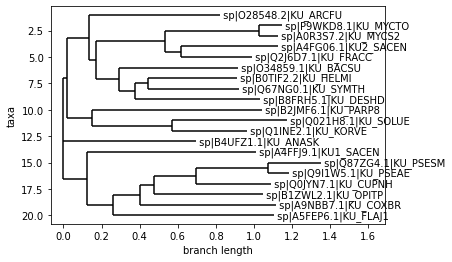

In [29]:
from Bio import Phylo
tree = Phylo.read("T1.raxml.bestTree", "newick")
Phylo.draw(tree)

In [30]:
!raxml-ng --bootstrap --msa T1.raxml.rba --model LG --prefix T2 --threads 2 --bs-tree 100


RAxML-NG v. 0.9.0 released on 20.05.2019 by The Exelixis Lab.
Developed by: Alexey M. Kozlov and Alexandros Stamatakis.
Contributors: Diego Darriba, Tomas Flouri, Benoit Morel, Sarah Lutteropp, Ben Bettisworth.
Latest version: https://github.com/amkozlov/raxml-ng
Questions/problems/suggestions? Please visit: https://groups.google.com/forum/#!forum/raxml

RAxML-NG was called at 17-Jul-2022 10:23:15 as follows:

raxml-ng --bootstrap --msa T1.raxml.rba --model LG --prefix T2 --threads 2 --bs-tree 100

Analysis options:
  run mode: Bootstrapping
  start tree(s): 
  bootstrap replicates: 100
  random seed: 1658053395
  tip-inner: OFF
  pattern compression: ON
  per-rate scalers: OFF
  site repeats: ON
  branch lengths: proportional (ML estimate, algorithm: NR-FAST)
  SIMD kernels: AVX2
  parallelization: PTHREADS (2 threads), thread pinning: OFF

         since the binary MSA file already contains a model definition.
         If you want to change the model, please re-run RAxML-NG 
       

In [31]:
!raxml-ng --support --tree T1.raxml.bestTree --bs-trees T2.raxml.bootstraps --prefix T3 --threads 2


RAxML-NG v. 0.9.0 released on 20.05.2019 by The Exelixis Lab.
Developed by: Alexey M. Kozlov and Alexandros Stamatakis.
Contributors: Diego Darriba, Tomas Flouri, Benoit Morel, Sarah Lutteropp, Ben Bettisworth.
Latest version: https://github.com/amkozlov/raxml-ng
Questions/problems/suggestions? Please visit: https://groups.google.com/forum/#!forum/raxml

RAxML-NG was called at 17-Jul-2022 10:37:28 as follows:

raxml-ng --support --tree T1.raxml.bestTree --bs-trees T2.raxml.bootstraps --prefix T3 --threads 2

Analysis options:
  run mode: Compute bipartition support (Felsenstein Bootstrap)
  start tree(s): user
  random seed: 1658054248
  SIMD kernels: AVX2
  parallelization: PTHREADS (2 threads), thread pinning: OFF

Reading reference tree from file: T1.raxml.bestTree
Reference tree size: 20

Reading bootstrap trees from file: T2.raxml.bootstraps
Loaded 100 trees with 20 taxa.

Best ML tree with Felsenstein bootstrap (FBP) support values saved to: /content/T3.raxml.support

Execution 

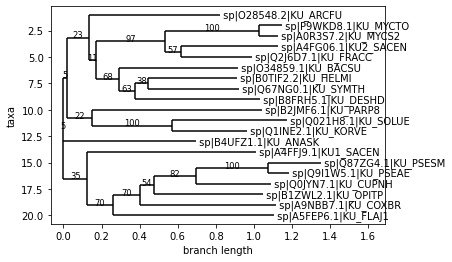

In [32]:
from Bio import Phylo
tree = Phylo.read("T3.raxml.support", "newick")
Phylo.draw(tree)

In [33]:
!raxml-ng --ancestral --msa clear_aligned_trimmed.fasta --tree T1.raxml.bestTree --model LG --prefix ASR


RAxML-NG v. 0.9.0 released on 20.05.2019 by The Exelixis Lab.
Developed by: Alexey M. Kozlov and Alexandros Stamatakis.
Contributors: Diego Darriba, Tomas Flouri, Benoit Morel, Sarah Lutteropp, Ben Bettisworth.
Latest version: https://github.com/amkozlov/raxml-ng
Questions/problems/suggestions? Please visit: https://groups.google.com/forum/#!forum/raxml

RAxML-NG was called at 17-Jul-2022 10:38:03 as follows:

raxml-ng --ancestral --msa clear_aligned_trimmed.fasta --tree T1.raxml.bestTree --model LG --prefix ASR

Analysis options:
  run mode: Ancestral state reconstruction
  start tree(s): user
  random seed: 1658054283
  tip-inner: ON
  pattern compression: OFF
  per-rate scalers: OFF
  site repeats: OFF
  branch lengths: proportional (ML estimate, algorithm: NR-FAST)
  SIMD kernels: AVX2
  parallelization: NONE/sequential

[00:00:00] Reading alignment from file: clear_aligned_trimmed.fasta
[00:00:00] Loaded alignment with 20 taxa and 276 sites

Alignment comprises 1 partitions and 2

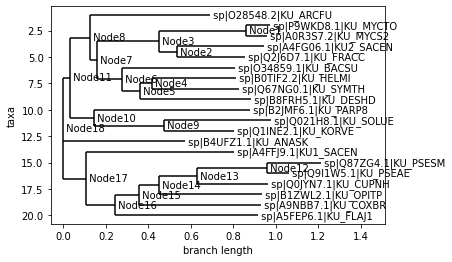

In [34]:
#Here, se the biopython Phylo package again!
from Bio import Phylo
tree = Phylo.read("ASR.raxml.ancestralTree", "newick")
Phylo.draw(tree)

In [35]:
import pandas as pd
data = pd.read_csv('/content/ASR.raxml.ancestralProbs',sep="\t")
print(data.head())

    Node  Site State       p_A      p_R      p_N      p_D      p_C      p_Q  \
0  Node1     1      M  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
1  Node1     2      R  0.00000  0.99974  0.00000  0.00000  0.00000  0.00001   
2  Node1     3      S  0.49125  0.00002  0.00011  0.00002  0.00021  0.00006   
3  Node1     4      I  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
4  Node1     5      W  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   

       p_E  ...      p_L      p_K      p_M      p_F      p_P      p_S  \
0  0.00000  ...  0.00008  0.00000  0.99990  0.00000  0.00000  0.00000   
1  0.00000  ...  0.00000  0.00024  0.00000  0.00000  0.00000  0.00000   
2  0.00004  ...  0.00000  0.00003  0.00001  0.00000  0.00008  0.49843   
3  0.00000  ...  0.00076  0.00000  0.00183  0.00001  0.00000  0.00000   
4  0.00000  ...  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   

       p_T  p_W  p_Y      p_V  
0  0.00000  0.0  0.0  0.00000  
1  0.00000  0.0  0.0  

In [38]:
import pandas as pd
data = pd.read_csv('/content/ASR.raxml.ancestralStates',sep="\t",header=None)
print(data.head())

       0                                                  1
0  Node1  MRSIWKGSIAFGLVNVPVKVYSATESDHDIRFHQVHAKDNGRIRYK...
1  Node2  MRAIWKGAISFGLVNIPVRLYSATZSDHDIQFHQVHRQDHGRIRYK...
2  Node3  MRAIWKGSISFGLVNIPVKLYSATESDHDIRFHQVHRQDHGRIRYK...
3  Node4  MRSIWKGSISFGLVNIPVKLYAATESDKDIRFHLLHKECHNPIQYR...
4  Node5  MRSIWKGSISFGLVNIPVKLYAATESDKDIRFHLLHKECHNPIRYR...
